<a href="https://colab.research.google.com/github/espada105/Artificial-Intelligence-Programming/blob/main/ArtificialInteligenceProgramming05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
if torch.cuda.is_available(): #gpu드라이버가있다면,그 중에 하나를 토치 디바이스로
    device = torch.device('cuda')
    print('현대 GPU가 있어서 디바이스로 정의했습니다')
else:
    device = torch.device('cpu')

현대 GPU가 있어서 디바이스로 정의했습니다


In [ ]:
tensor = [[1,2,3,4],
          [1,2,3,4],
          [1,2,3,4],
          [1,2,3,4]]

tensor_4x4 = torch.tensor(tensor)
tensor_4x4

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]])

In [ ]:
tensor_4x4_sum = tensor_4x4.sum()
tensor_4x4_sum

tensor(40)

In [ ]:
tensor_4x4_sum = tensor_4x4.sum()
tensor_4x4_sum

tensor(40)

In [ ]:
tensor_4x4_sum.item()

40

In [ ]:
type(tensor_4x4_sum.item())

int

# 텐서와 텐서 간의 덧셈

In [ ]:
print(f"tensor_4x4 = {tensor}\n")

tensor_4x4 = [[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]



In [ ]:
tensor_4x4.add(2)

tensor([[3, 4, 5, 6],
        [3, 4, 5, 6],
        [3, 4, 5, 6],
        [3, 4, 5, 6]])

In [ ]:
tensor_4x4

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]])

# Tensor를 Numpy가 메모리 위치 공유

In [ ]:
tensor = torch.ones(6) #메모리사용량을 줄이기위해,카피된것처럼보이지만 메모리 위치만 공유함
print(f"tensor = {tensor}")
numpy = tensor.numpy() #from이 없음
print(f"numpy = {numpy}")

tensor = tensor([1., 1., 1., 1., 1., 1.])
numpy = [1. 1. 1. 1. 1. 1.]


In [ ]:
tensor.add_(1)
print(f"tensor = {tensor}")
print(f"numpy = {numpy}")

tensor = tensor([3., 3., 3., 3., 3., 3.])
numpy = [3. 3. 3. 3. 3. 3.]


#Numpy를 Tensor가 메모리 위치 공유

In [ ]:
import numpy as np
numpy_1 = np.ones(6)
tensor = torch.from_numpy(numpy_1)#from이 있음
print(f"tensor = {tensor}")
print(f"numpy_1 = {numpy_1}")


tensor = tensor([1., 1., 1., 1., 1., 1.], dtype=torch.float64)
numpy_1 = [1. 1. 1. 1. 1. 1.]


In [ ]:
np.add(numpy_1,2,out=numpy_1)
print(f"tensor = {tensor}")
print(f"numpy_ = {numpy_1}")

tensor = tensor([3., 3., 3., 3., 3., 3.], dtype=torch.float64)
numpy_ = [3. 3. 3. 3. 3. 3.]


# FashionMNIST라는 데이터셋을 다운로드

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", #저장장소, (data라는 폴더를 만들고 저장하겠다)
    train=True, #학습용 데이터 셋을 가져올건지
    download=True, #
    transform=ToTensor() #Tensor로 변환
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:11<00:00, 2356775.17it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 213639.09it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3940311.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6170985.14it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 데이터셋 안에 어떤 이미지가 있는가


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28])


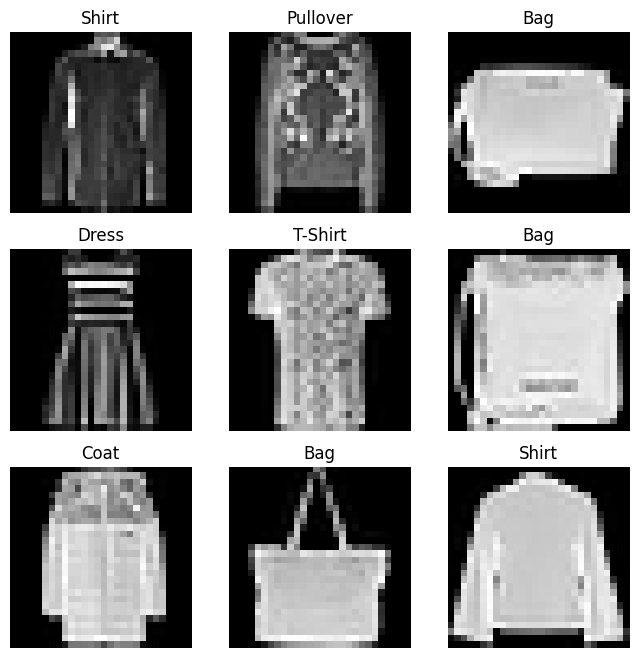

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
print(training_data)
print(training_data[0][0].shape)

for i in range(1,cols * rows +1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
    # plt.imshow(img,permute(1,2,0))
plt.show()

# Dataset과 DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

In [ ]:
samples = [1,2]
samples_iter = iter(samples)
type(samples_iter)

list_iterator

In [ ]:
next(samples_iter)

1

In [ ]:
next(samples_iter)

2

In [ ]:
next(samples_iter)

StopIteration: 

train_images.shape = torch.Size([64, 1, 28, 28])
train_labels.shape = torch.Size([64])


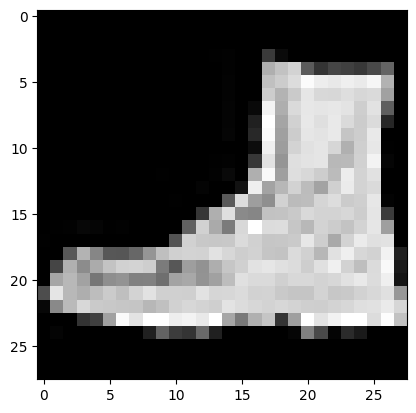

label = 9


In [ ]:
train_images, train_labels = next(iter(train_dataloader))
print(f"train_images.shape = {train_images.size()}")
print(f"train_labels.shape = {train_labels.size()}")

img = train_images[0]
label = train_labels[0]

plt.imshow(img.squeeze(),cmap="gray")
plt.show()
print(f"label = {label}")

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    )